In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp

In [2]:
nineties_df = pd.read_csv("../1990.csv")
year_df = nineties_df["year"]
bpm_df = nineties_df["bpm"]
dnce_df = nineties_df["dnce"]
dB_df = nineties_df["dB"]
live_df = nineties_df["live"]
val_df = nineties_df["val"]
dur_df = nineties_df["dur"]
acous_df = nineties_df["acous"]
spch_df = nineties_df["spch"]
popularity_df = nineties_df["popularity"]


In [26]:
nineties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          88 non-null     object 
 1   artist         88 non-null     object 
 2   genre          85 non-null     object 
 3   year           88 non-null     int64  
 4   bpm            88 non-null     int64  
 5   nrgy           88 non-null     int64  
 6   dnce           88 non-null     int64  
 7   dB             88 non-null     int64  
 8   live           88 non-null     int64  
 9   val            88 non-null     int64  
 10  dur            88 non-null     int64  
 11  acous          88 non-null     int64  
 12  spch           88 non-null     int64  
 13  popularity     88 non-null     int64  
 14  has_win_award  88 non-null     float64
dtypes: float64(1), int64(11), object(3)
memory usage: 10.4+ KB


In [3]:
# Compute additional information
dfs = ["bpm", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"]
stats_dfs = []

for df in dfs:
    curr_df  = nineties_df[df]
    Q1 = np.percentile(curr_df, 25, method='midpoint')
    Q3 = np.percentile(curr_df, 75, method='midpoint')
    IQR = Q3-Q1  # Interquartile range

    stats = [
        ['Mean', np.mean(curr_df)],
        ['Median', np.median(curr_df)],
        ['Mode', scp.mode(curr_df)[0][0]],
        ['Standard Deviation', np.std(curr_df)],
        ['Variance', np.var(curr_df)],
        ['Minimum', np.min(curr_df)],
        ['Maximum', np.max(curr_df)],
        ['Q1', Q1],
        ['Q3', Q3],
        ['IQR', IQR],
        ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
        ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
    ]

    print(f'{df.upper()} Description')
    display(pd.DataFrame(stats, columns=['Measure', 'Value']))

BPM Description


,Measure,Value
0,Mean,122.136364
1,Median,125.000000
2,Mode,128.000000
3,Standard Deviation,25.840499
4,Variance,667.731405
5,Minimum,67.000000
6,Maximum,174.000000
7,Q1,102.000000
8,Q3,135.000000
9,IQR,33.000000


DNCE Description


,Measure,Value
0,Mean,65.147727
1,Median,67.000000
2,Mode,70.000000
3,Standard Deviation,14.299189
4,Variance,204.466813
5,Minimum,30.000000
6,Maximum,92.000000
7,Q1,55.500000
8,Q3,74.500000
9,IQR,19.000000


DB Description


,Measure,Value
0,Mean,-7.681818
1,Median,-8.000000
2,Mode,-9.000000
3,Standard Deviation,2.538546
4,Variance,6.444215
5,Minimum,-15.000000
6,Maximum,-1.000000
7,Q1,-9.000000
8,Q3,-6.000000
9,IQR,3.000000


LIVE Description


,Measure,Value
0,Mean,17.795455
1,Median,13.000000
2,Mode,10.000000
3,Standard Deviation,13.750338
4,Variance,189.071798
5,Minimum,3.000000
6,Maximum,93.000000
7,Q1,9.500000
8,Q3,23.000000
9,IQR,13.500000


VAL Description


,Measure,Value
0,Mean,55.863636
1,Median,59.000000
2,Mode,53.000000
3,Standard Deviation,24.104970
4,Variance,581.049587
5,Minimum,10.000000
6,Maximum,97.000000
7,Q1,36.000000
8,Q3,76.000000
9,IQR,40.000000


DUR Description


,Measure,Value
0,Mean,255.522727
1,Median,249.500000
2,Mode,221.000000
3,Standard Deviation,40.961728
4,Variance,1677.863120
5,Minimum,191.000000
6,Maximum,394.000000
7,Q1,224.500000
8,Q3,275.500000
9,IQR,51.000000


ACOUS Description


,Measure,Value
0,Mean,20.215909
1,Median,11.000000
2,Mode,0.000000
3,Standard Deviation,21.584637
4,Variance,465.896565
5,Minimum,0.000000
6,Maximum,76.000000
7,Q1,3.500000
8,Q3,29.500000
9,IQR,26.000000


SPCH Description


,Measure,Value
0,Mean,6.386364
1,Median,4.000000
2,Mode,3.000000
3,Standard Deviation,6.402116
4,Variance,40.987087
5,Minimum,2.000000
6,Maximum,36.000000
7,Q1,3.000000
8,Q3,6.000000
9,IQR,3.000000


POPULARITY Description


,Measure,Value
0,Mean,63.886364
1,Median,65.000000
2,Mode,73.000000
3,Standard Deviation,7.517301
4,Variance,56.509814
5,Minimum,43.000000
6,Maximum,79.000000
7,Q1,58.500000
8,Q3,70.000000
9,IQR,11.500000


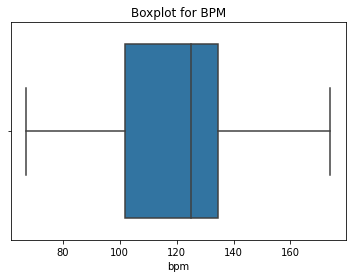

Outlier exists? False 
----------------------------------------------


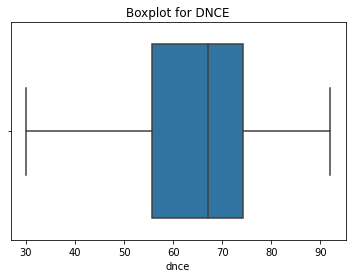

Outlier exists? False 
----------------------------------------------


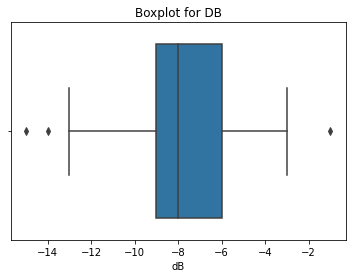

Outlier exists? True 
----------------------------------------------


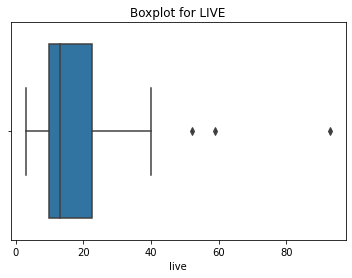

Outlier exists? True 
----------------------------------------------


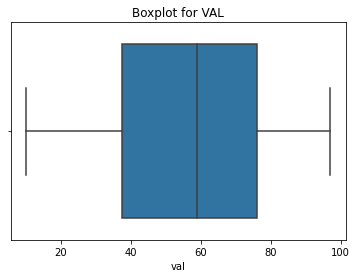

Outlier exists? False 
----------------------------------------------


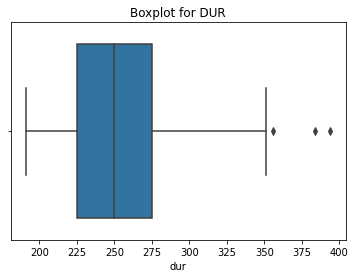

Outlier exists? True 
----------------------------------------------


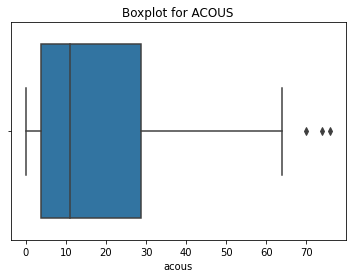

Outlier exists? True 
----------------------------------------------


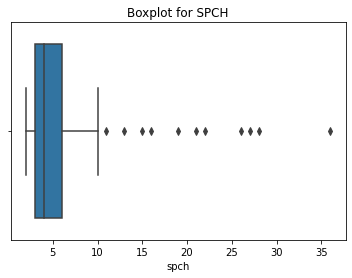

Outlier exists? True 
----------------------------------------------


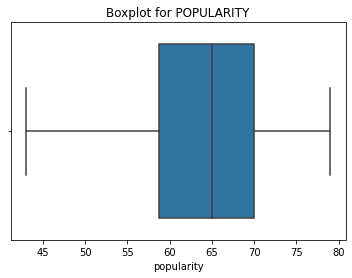

Outlier exists? False 
----------------------------------------------


In [4]:
## Boxplot visualization
for df in dfs:
    plt.title(f'Boxplot for {df.upper()}')
    sns.boxplot(x=df, data=nineties_df)
    plt.show()

    curr_df  = nineties_df[df]
    Q1 = np.percentile(curr_df, 25, method='midpoint')
    Q3 = np.percentile(curr_df, 75, method='midpoint')
    IQR = Q3-Q1  # Interquartile range

    RLB = Q1 - 1.5*IQR
    RUB = Q3 + 1.5*IQR
    print("Outlier exists?", np.max(curr_df) > RUB, "\n----------------------------------------------")


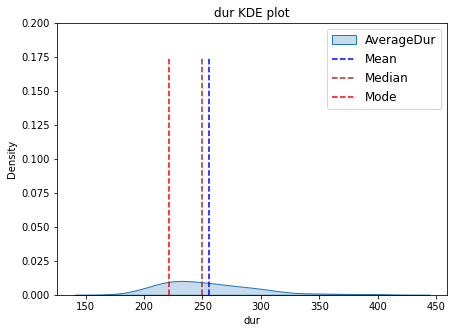

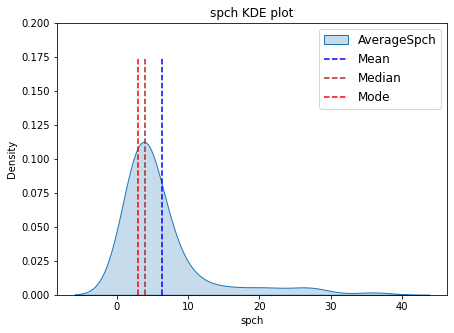

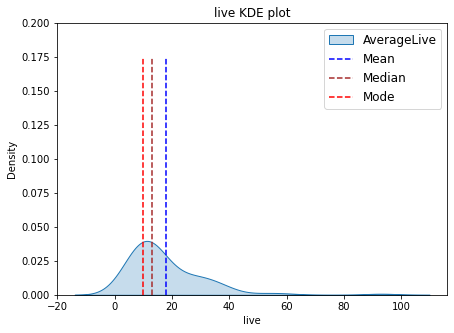

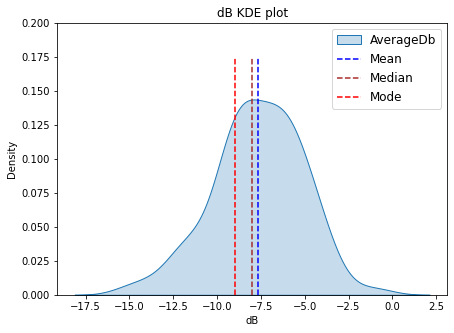

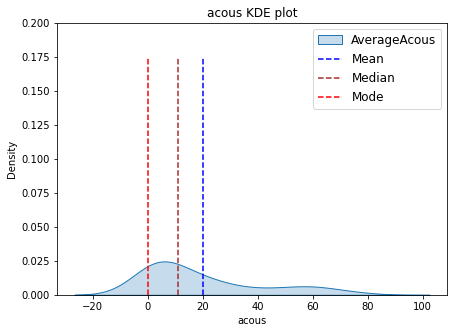

In [41]:
kde_dfs = ["dur", "spch", "live", "dB", "acous"]

for df in kde_dfs:
    plt.figure(figsize=(7,5))
    plt.gca().set_ylim([None, 0.2])
    sns.kdeplot(data = nineties_df[df], shade=True)
    plt.vlines(x=np.mean(nineties_df[df]), ymin=0, ymax=0.175, color='blue', linestyle='--')
    plt.vlines(x=np.median(nineties_df[df]), ymin=0, ymax=0.175, color='brown', linestyle='--')
    plt.vlines(x=scp.mode(nineties_df[df])[0][0], ymin=0, ymax=0.175, color='red', linestyle='--')
    plt.legend([f'Average{df.capitalize()}', 'Mean', 'Median', 'Mode'], fontsize=12)
    plt.title(f"{df} KDE plot")
    plt.show()

<AxesSubplot:title={'center':'Pie Chart of Genres'}>

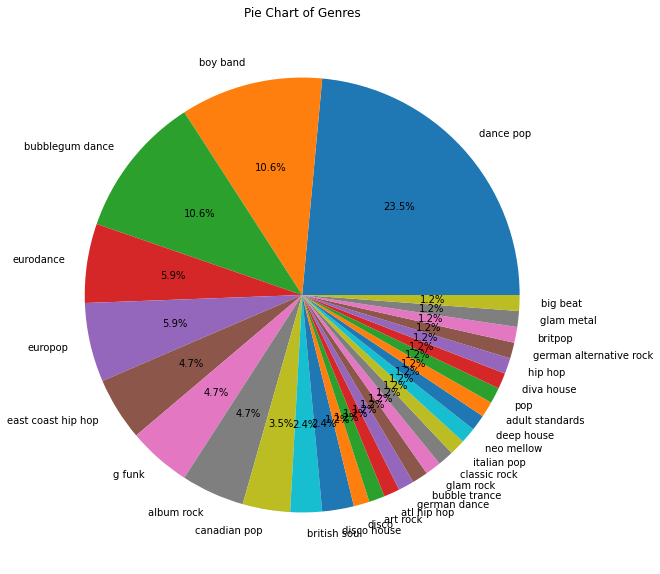

In [25]:
## Pie chart for genres
genre_df = nineties_df["genre"]
genre_count = genre_df.value_counts()

genre_count.plot(
    kind="pie",
    figsize=(10,10),
    title="Pie Chart of Genres",
    ylabel="",
    autopct='%1.1f%%'
    )



Text(0.5, 1.0, 'Correlation matrix')

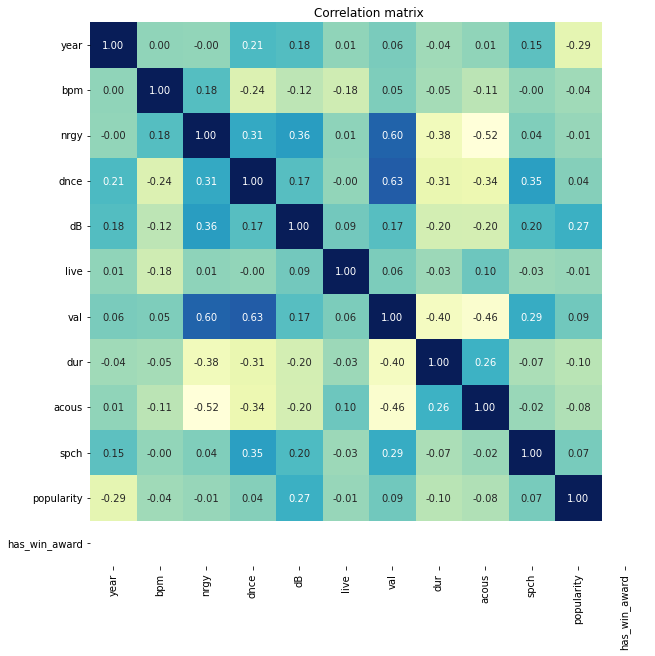

In [42]:
plt.figure(figsize=(10,10))

sns.heatmap(
    nineties_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=nineties_df.select_dtypes(np.number).columns,
    yticklabels=nineties_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")